With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset and Information

In [2]:
df=pd.read_csv('file1.csv')

In [3]:
df.head(5)

,Unnamed: 0,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,0,Maruti Swift,2020,30620.0,Petrol,Manual,607999.0
1,1,Renault TRIBER,2020,89969.0,Petrol,Manual,541599.0
2,2,Maruti Swift,2020,22937.0,Petrol,Manual,609649.0
3,3,Hyundai Grand i10,2020,99139.0,Petrol,Manual,556999.0
4,4,Maruti Celerio,2018,14450.0,Petrol,Manual,467199.0


In [4]:
df.shape

(1430, 7)

In [5]:
df.isnull().sum()

Unnamed: 0            0
Car Model             0
Year                  0
Kilometers Driven     0
Fuel Type             0
Transmission Type    80
Price                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1430 non-null   int64  
 1   Car Model          1430 non-null   object 
 2   Year               1430 non-null   int64  
 3   Kilometers Driven  1430 non-null   float64
 4   Fuel Type          1430 non-null   object 
 5   Transmission Type  1350 non-null   object 
 6   Price              1430 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 78.3+ KB


### kilometer and Price are floating data columns; unnamed: 0,year are integer data type columns,car model,fuel type and transmission type are object data type column. There are 1430 Rows and 7 Columns in Data Set.target is price.car model, year, kilometer, fuel, transmission are features.    All are continous/numeric and categorical  data

In [7]:
df.describe(include='all')

,Unnamed: 0,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
count,1430.000000,1430,1430.000000,1430.000000,1430,1350,1.430000e+03
unique,NaN,95,NaN,NaN,3,2,NaN
top,NaN,Maruti Baleno,NaN,NaN,Petrol,Manual,NaN
freq,NaN,102,NaN,NaN,1189,1172,NaN
mean,764.781119,NaN,2017.581818,39144.097203,NaN,NaN,5.992193e+05
std,478.837628,NaN,2.755988,26107.421325,NaN,NaN,2.906849e+05
min,0.000000,NaN,2008.000000,202.000000,NaN,NaN,1.635990e+05
25%,357.250000,NaN,2016.000000,18639.750000,NaN,NaN,4.186990e+05
50%,714.500000,NaN,2018.000000,34063.500000,NaN,NaN,5.435990e+05
75%,1160.750000,NaN,2020.000000,55527.750000,NaN,NaN,6.871990e+05


In [8]:
df['Price'].unique()

array([607999., 541599., 609649., ..., 578299., 311999., 519299.])

In [9]:
df['Price'].nunique()

1269

In [10]:
df.loc[df['Price']== " "]

,Unnamed: 0,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price


In [11]:
df.loc[:,"Price"]

0       607999.0
1       541599.0
2       609649.0
3       556999.0
4       467199.0
          ...   
1425    578299.0
1426    605799.0
1427    311999.0
1428    519299.0
1429    337399.0
Name: Price, Length: 1430, dtype: float64

In [12]:
df.shape

(1430, 7)

In [13]:
# these are catgorical data fill missing values with mode method
df['Transmission Type']=df['Transmission Type'].fillna(df['Transmission Type'].mode()[0])

In [14]:
df.isnull().sum()

Unnamed: 0           0
Car Model            0
Year                 0
Kilometers Driven    0
Fuel Type            0
Transmission Type    0
Price                0
dtype: int64

In [15]:
df.nunique()

Unnamed: 0           1430
Car Model              95
Year                   15
Kilometers Driven    1412
Fuel Type               3
Transmission Type       2
Price                1269
dtype: int64

### checking the distribution of categorical data

In [16]:
print(df['Fuel Type'].value_counts())
print(df['Transmission Type'].value_counts())

Petrol          1189
Petrol + CNG     131
Diesel           110
Name: Fuel Type, dtype: int64
Manual       1252
Automatic     178
Name: Transmission Type, dtype: int64


# EDA

In [17]:
df = df.drop("Unnamed: 0", axis=1)

#### dropped the unnamed column as it was not giving any insight over the sales details and was just a numbered data that was basically of no use to us since we have indexing present for our data frame.

## Encoding the categorical data

In [18]:
#encoding fuel type column
df.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2,'Petrol + CNG':3}},inplace=True)
#encoding transmission type column
df.replace({'Transmission Type':{'Manual':0,'Automatic':1}},inplace=True)

In [19]:
df.head(6)

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,Maruti Swift,2020,30620.0,0,0,607999.0
1,Renault TRIBER,2020,89969.0,0,0,541599.0
2,Maruti Swift,2020,22937.0,0,0,609649.0
3,Hyundai Grand i10,2020,99139.0,0,0,556999.0
4,Maruti Celerio,2018,14450.0,0,0,467199.0
5,Maruti New Wagon-R,2020,90293.0,3,0,584099.0


In [20]:
from sklearn import preprocessing

In [21]:
label_encoder = preprocessing.LabelEncoder()
df['Car Model']= label_encoder.fit_transform(df['Car Model'])


In [22]:
df.head()

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,60,2020,30620.0,0,0,607999.0
1,73,2020,89969.0,0,0,541599.0
2,60,2020,22937.0,0,0,609649.0
3,16,2020,99139.0,0,0,556999.0
4,49,2018,14450.0,0,0,467199.0


### Data Visualization

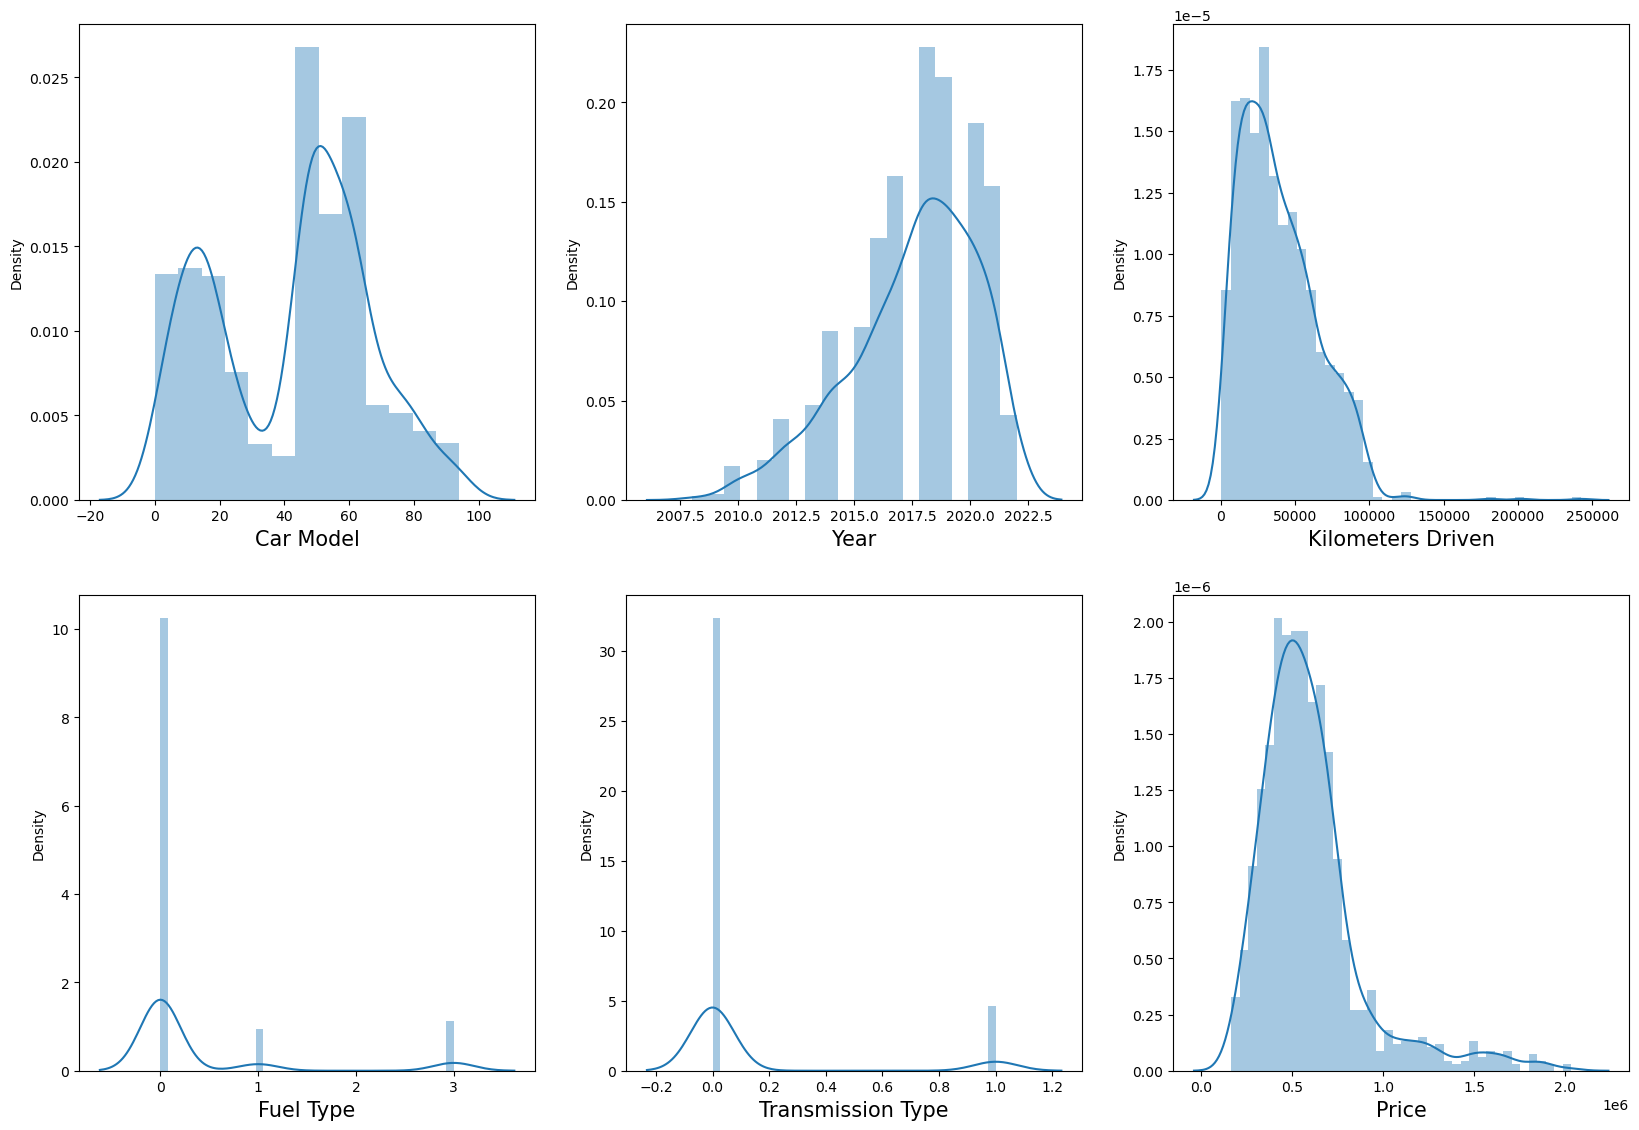

In [23]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in df:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

### Pair Plot

<Figure size 1500x1000 with 0 Axes>

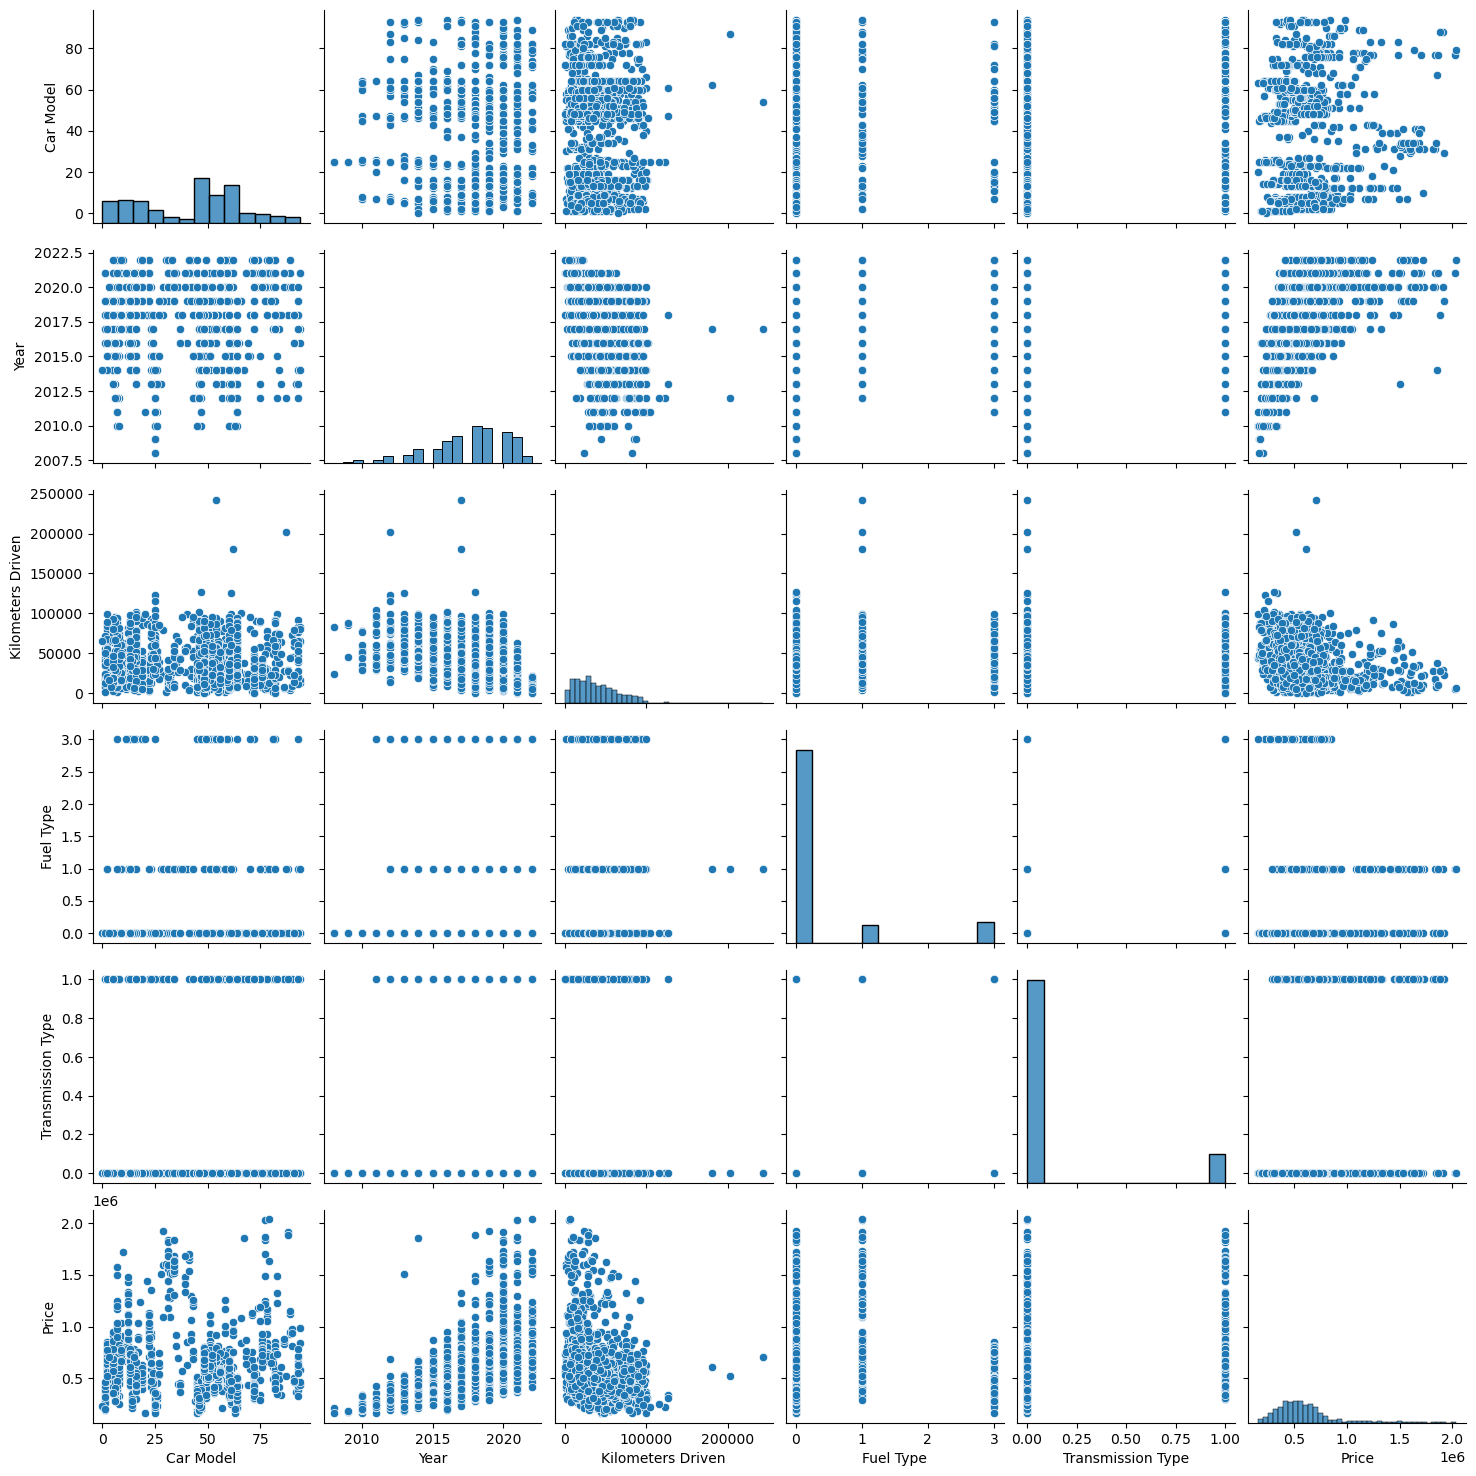

In [24]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

### With the help of above pairplot we can see that year,fuel type and transmision type columns have a linear relationship with price. However the car model,kilometers driven column is too scattered and we can see an increase with respect to price but their is no definite linear pattern into it.

## Box Plot

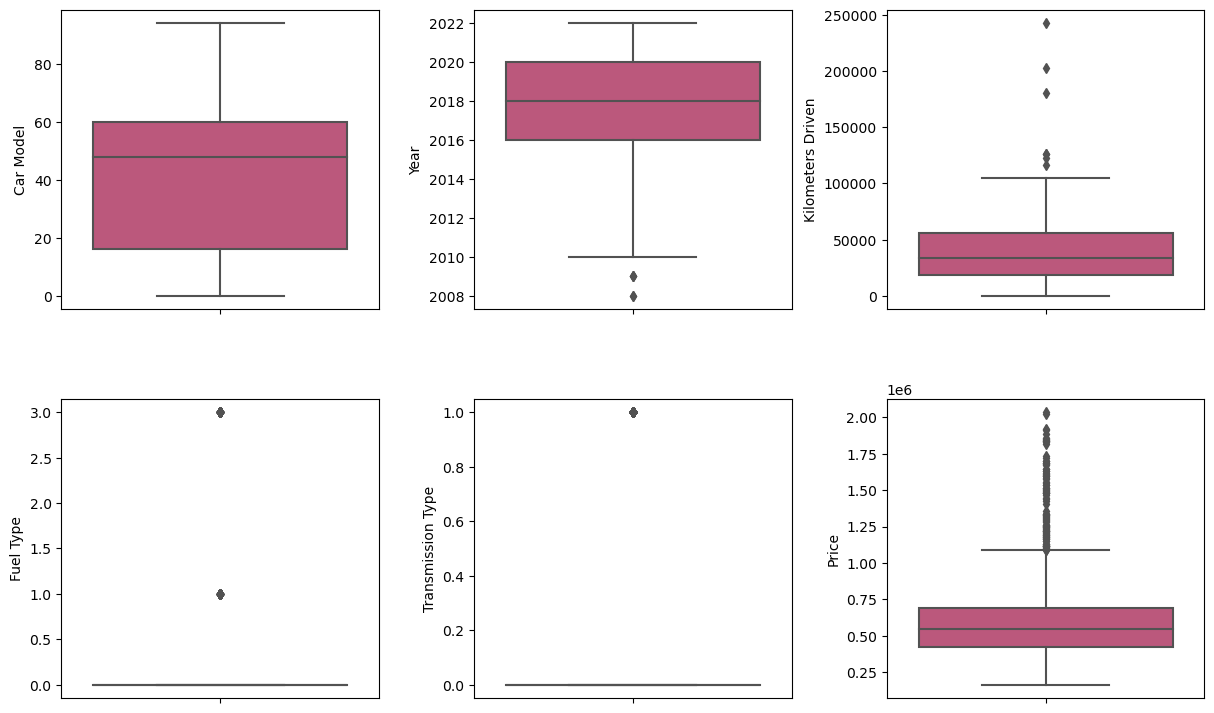

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

### Distribution plot

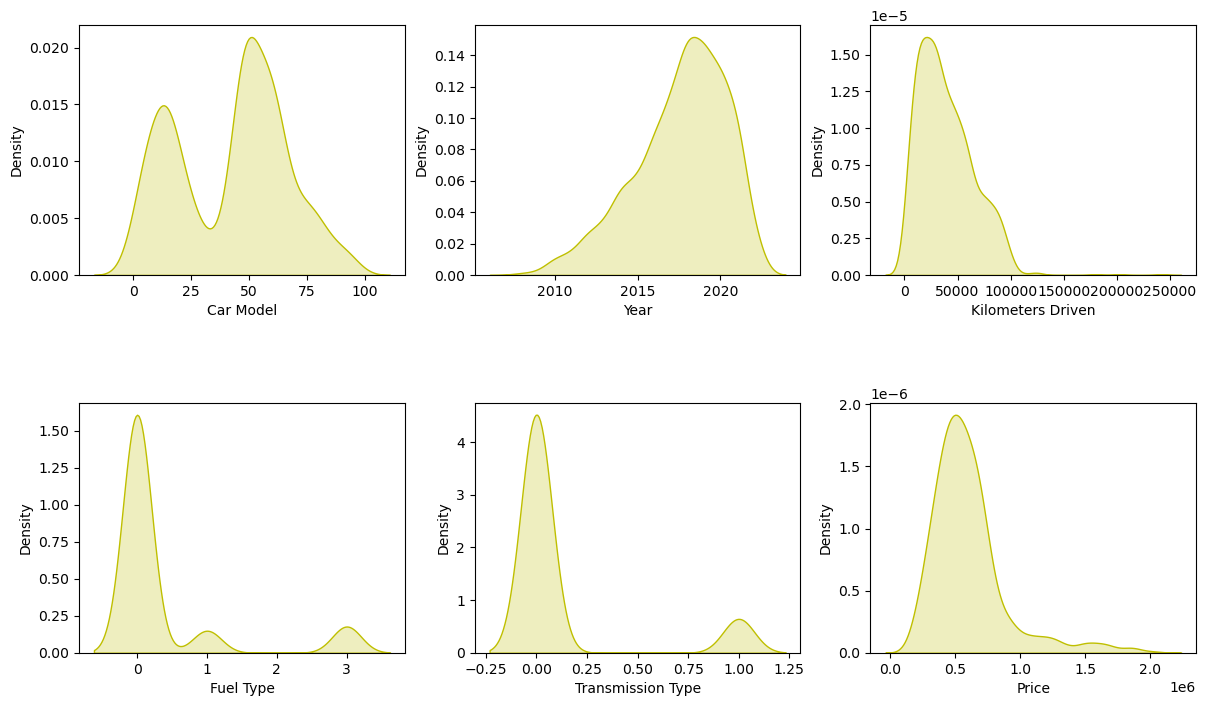

In [26]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

## check skewness and outliers and correlation

In [27]:
df.corr()['Price'].sort_values()

Kilometers Driven   -0.253770
Car Model           -0.017057
Fuel Type            0.045362
Transmission Type    0.260270
Year                 0.513453
Price                1.000000
Name: Price, dtype: float64

## Heat map

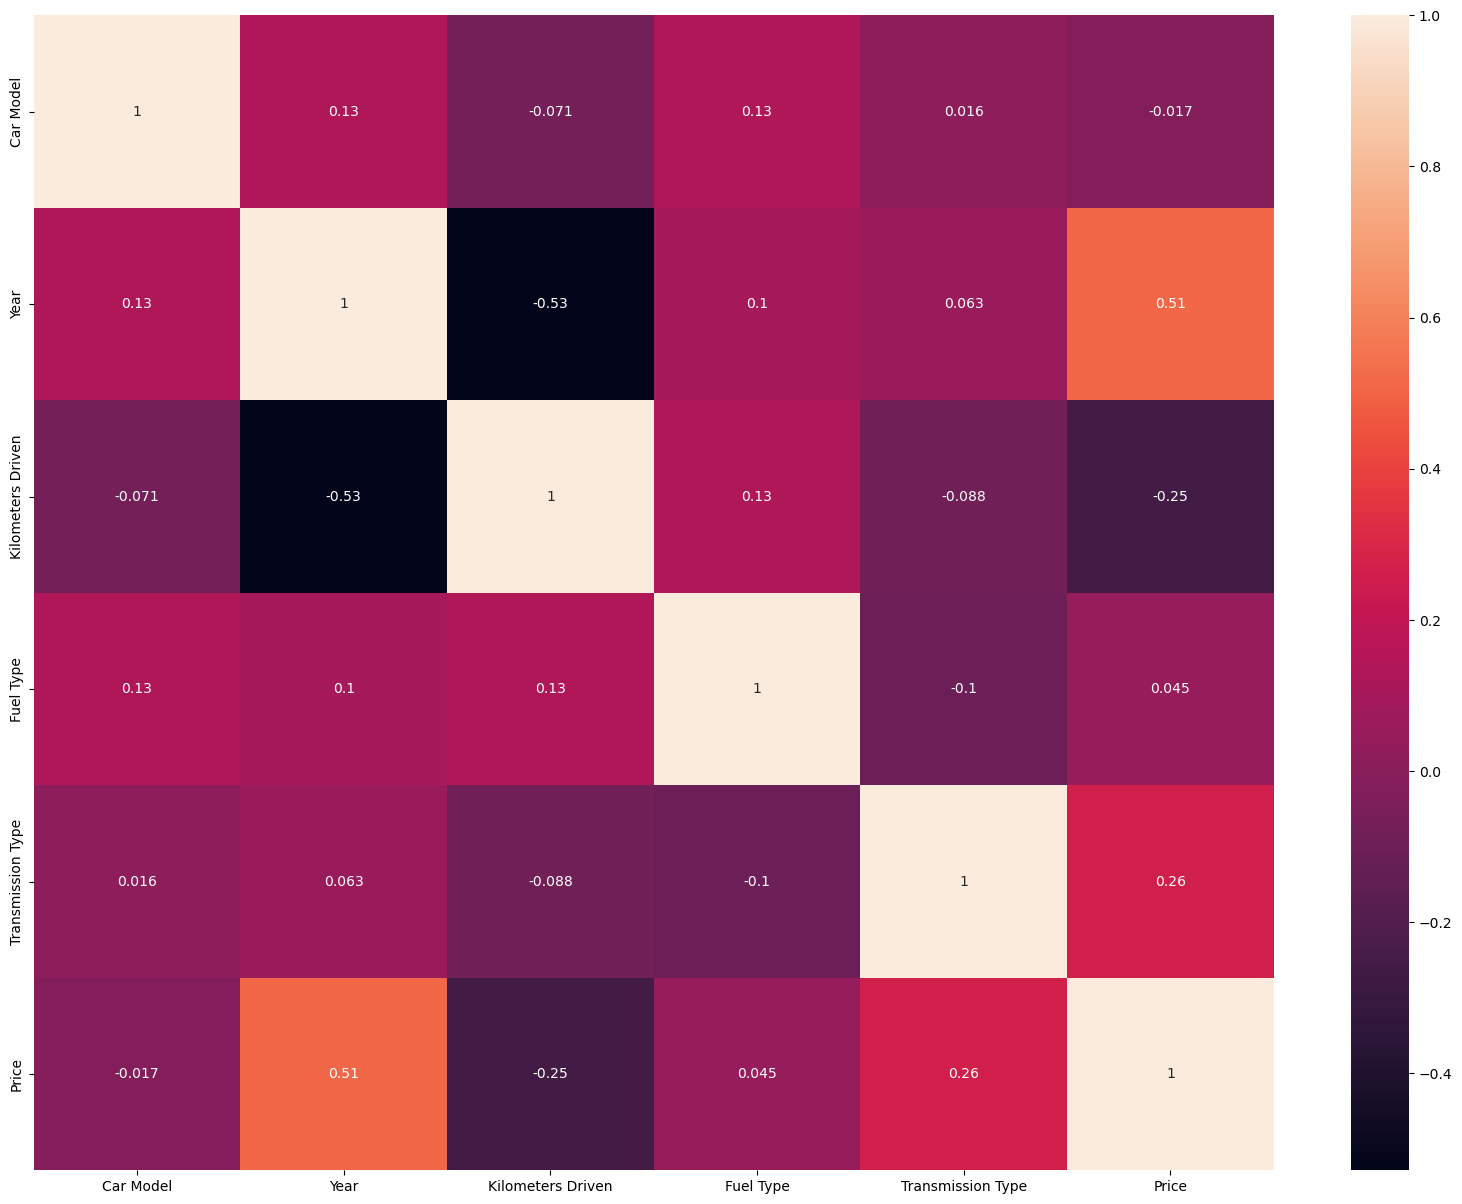

In [28]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

### only Year is highly correlated to the Price.

## Line plot

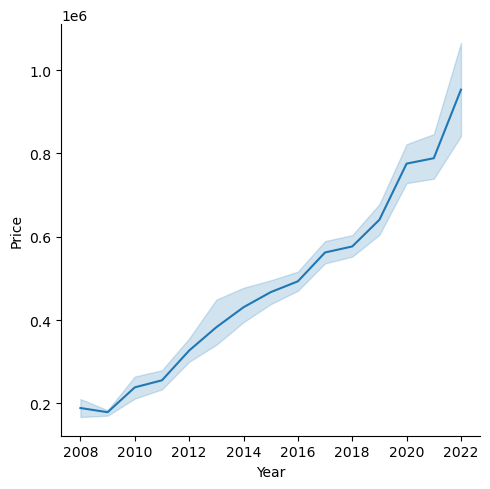

In [29]:
sns.relplot(x="Year", y="Price", kind="line", data=df)

### the line plot for year vs price shows a proper increasing pattern wherein the year are playing a major role in the saling price thus inreasing the price.

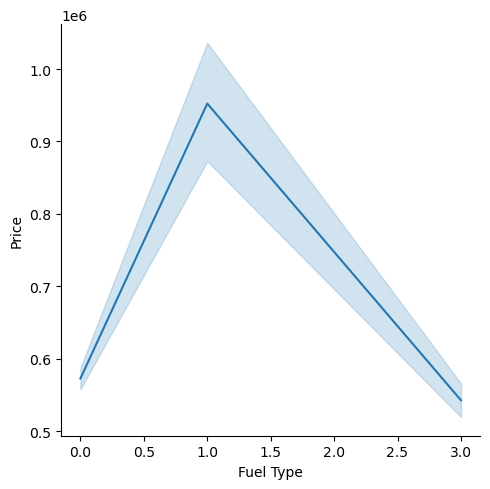

In [30]:
sns.relplot(x="Fuel Type", y="Price", kind="line", data=df)

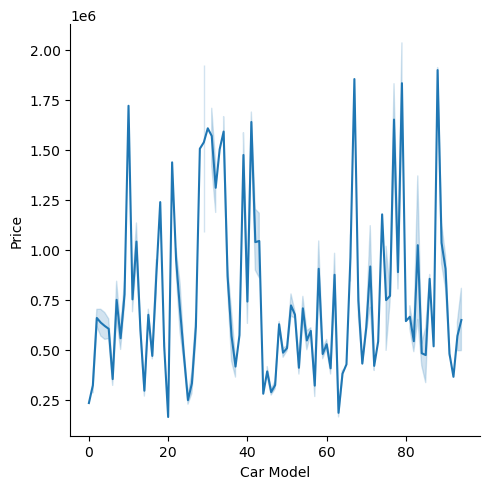

In [31]:
sns.relplot(x="Car Model", y="Price", kind="line", data=df)

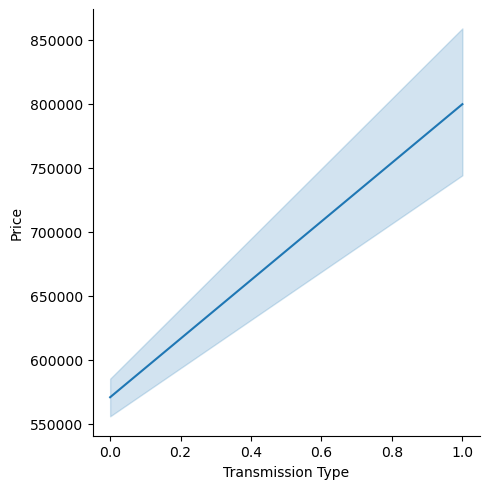

In [32]:
sns.relplot(x="Transmission Type", y="Price", kind="line", data=df)

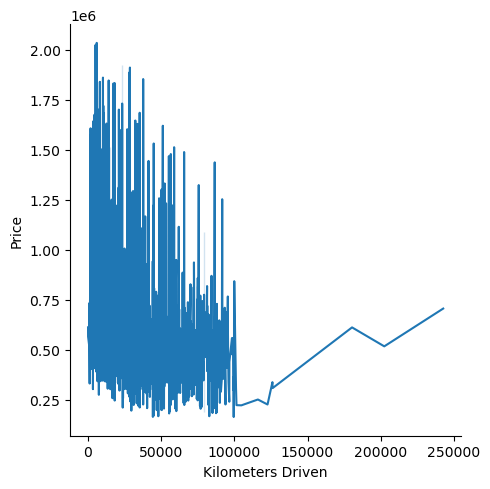

In [33]:
sns.relplot(x="Kilometers Driven", y="Price", kind="line", data=df)

In [34]:
df.skew()

Car Model           -0.090537
Year                -0.707789
Kilometers Driven    1.134968
Fuel Type            2.461326
Transmission Type    2.277446
Price                1.927690
dtype: float64

### skewness are present in the 4 column

In [35]:
# separating the feature and target columns

#X = df.drop('Price', axis = 1)
#y = df['Price']

## Removing Outliers from numerical column

In [37]:
numerical_features = ['Year','Kilometers Driven']
df_num = df[numerical_features]
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR
((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any()

Year                 True
Kilometers Driven    True
dtype: bool

In [38]:
df.shape

(1430, 6)

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)


(array([   5,   13,   28,   39,   67,   77,   92,   96,  118,  131,  132,
         133,  134,  149,  151,  154,  155,  164,  172,  174,  182,  192,
         206,  218,  219,  243,  253,  258,  260,  266,  272,  292,  295,
         313,  324,  325,  337,  344,  351,  353,  366,  374,  380,  389,
         394,  399,  409,  424,  431,  444,  452,  473,  474,  475,  483,
         488,  491,  495,  520,  521,  528,  532,  536,  538,  553,  556,
         558,  570,  584,  615,  618,  634,  637,  646,  653,  656,  659,
         664,  670,  680,  684,  686,  695,  698,  701,  711,  715,  722,
         744,  767,  781,  783,  789,  790,  794,  804,  806,  810,  811,
         813,  817,  826,  828,  836,  838,  841,  843,  845,  849,  850,
         855,  862,  867,  872,  887,  898,  902,  936,  945,  947,  949,
         958,  959,  965,  979,  980,  982,  985,  989,  990,  999, 1004,
        1013, 1019, 1023, 1024, 1035, 1039, 1041, 1045, 1046, 1051, 1062,
        1069, 1072, 1082, 1090, 1094, 

In [40]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,60,2020,30620.0,0,0,607999.0
1,73,2020,89969.0,0,0,541599.0
2,60,2020,22937.0,0,0,609649.0
3,16,2020,99139.0,0,0,556999.0
4,49,2018,14450.0,0,0,467199.0
...,...,...,...,...,...,...
1425,13,2015,42897.0,0,0,578299.0
1426,13,2018,34398.0,0,0,605799.0
1427,46,2018,35381.0,0,0,311999.0
1428,2,2016,89505.0,1,0,519299.0


In [41]:
df_new_z.shape

(1244, 6)

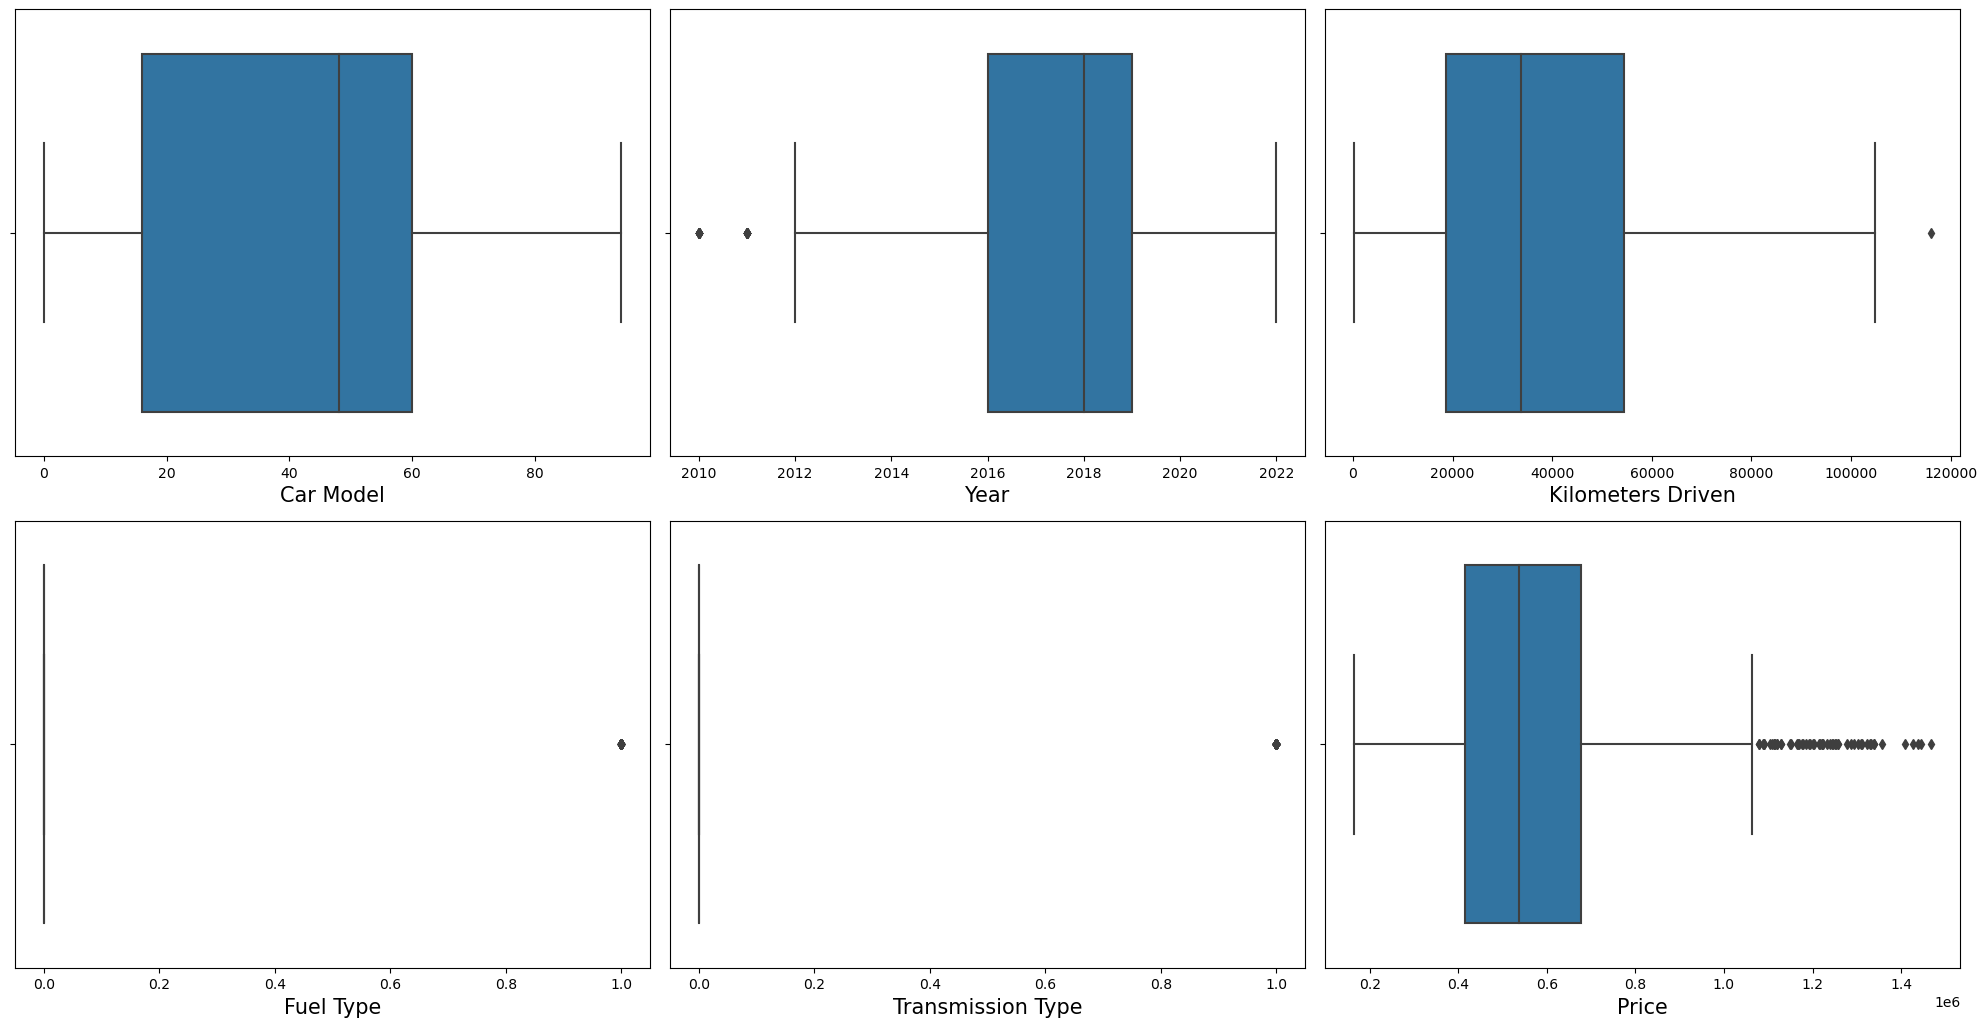

In [42]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df_new_z.columns:
    if plotnumber <= 6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df_new_z[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [43]:
X = df.drop("Price",axis=1)
Y = df["Price"]

## Features Scaling

In [44]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type
0,0.733808,0.877735,-0.326615,-0.398872,-0.377058
1,1.272743,0.877735,1.947442,-0.398872,-0.377058
2,0.733808,0.877735,-0.621002,-0.398872,-0.377058
3,-1.090276,0.877735,2.298806,-0.398872,-0.377058
4,0.277787,0.151789,-0.946196,-0.398872,-0.377058
...,...,...,...,...,...
1425,-1.214645,-0.937131,0.143799,-0.398872,-0.377058
1426,-1.214645,0.151789,-0.181855,-0.398872,-0.377058
1427,0.153418,0.151789,-0.144189,-0.398872,-0.377058
1428,-1.670667,-0.574158,1.929663,0.735098,-0.377058


## Creating Train and test dataset

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

### taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

# Machine Learning Model for Regression and Evaluation Metrics

In [46]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [47]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 283152.152916485
R2 Score is: 27.973970785177883
Cross Validation Score: -0.8897969476748235
R2 Score - Cross Validation Score is 28.863767732852708


In [48]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 341426.2559027927
R2 Score is: -4.723359988976883
Cross Validation Score: -10.87536653231775
R2 Score - Cross Validation Score is 6.1520065433408675


In [49]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 178292.63621185854
R2 Score is: 71.44273908166593
Cross Validation Score: 40.955745445386505
R2 Score - Cross Validation Score is 30.48699363627943


In [50]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 288525.1191366402
R2 Score is: 25.214570064897746
Cross Validation Score: 11.190166410800941
R2 Score - Cross Validation Score is 14.024403654096805


In [51]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 286864.07926648774
R2 Score is: 26.07317127934642
Cross Validation Score: 12.127124576902803
R2 Score - Cross Validation Score is 13.946046702443615


In [52]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 186903.63614731497
R2 Score is: 68.61766618508874
Cross Validation Score: 16.129853552171625
R2 Score - Cross Validation Score is 52.48781263291711


In [53]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 232727.61844078978
R2 Score is: 51.342971012674376
Cross Validation Score: -13.915663521117136
R2 Score - Cross Validation Score is 65.25863453379151


In [54]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 183217.19531948946
R2 Score is: 69.84341232175223
Cross Validation Score: 44.988638911884834
R2 Score - Cross Validation Score is 24.85477340986739


## Decision Tree Regressor gives good result so firstly done hyperparameter tunning

In [55]:
# Choosing Decision Tree Regressor

fmod_param = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
             

### After comparing all the regression models I have selected decision tree Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [56]:
GSCV = GridSearchCV(DecisionTreeRegressor(), fmod_param, cv=5)

### I am using the Grid Search CV method for hyper parameter tuning my best model.

In [57]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [58]:
GSCV.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [63]:
Final_Model = DecisionTreeRegressor(max_depth=5,
 max_features='auto',
 max_leaf_nodes=None,
 min_samples_leaf=1,
 min_weight_fraction_leaf=0.1,
 splitter='best')
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 33.29599644269301


In [64]:
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']